### DATA LOADING

In [1]:
import pandas as pd

# Define the URL to the dataset
url = "C:/Users/hp/Desktop/household_power_consumption.txt"

# Load the dataset into a DataFrame
df = pd.read_csv(url, sep=';', parse_dates={'datetime': ['Date', 'Time']}, 
                 na_values=['?'], infer_datetime_format=True)

# Preview the first few rows
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [2]:
# Check the data types of each column
data_types = df.dtypes

# Display the data types
print(data_types)

datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


In [3]:
# Display the count of missing values in each column before handling them
print("Missing values before filling:")
print(df.isnull().sum())

# Fill missing values with the mean for each respective column
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(), inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(), inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(), inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(), inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(), inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(), inplace=True)

# Display the count of missing values in each column after handling them
print("Missing values after filling:")
print(df.isnull().sum())

Missing values before filling:
datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Missing values after filling:
datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### Exploratory Data Analysis

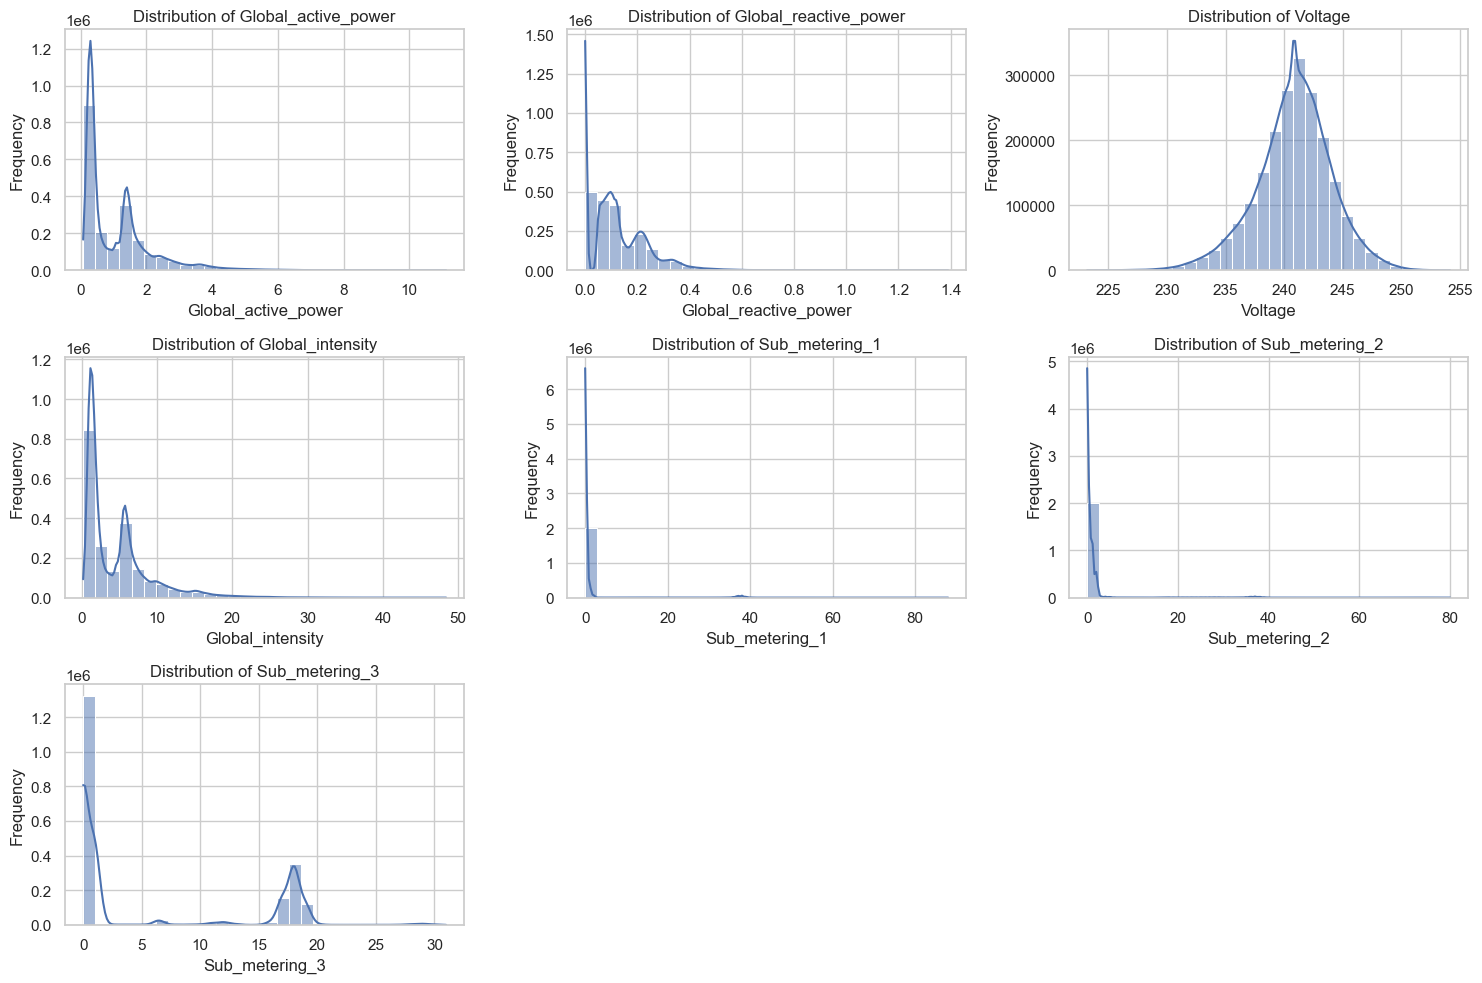

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distributions for each numerical attribute
attributes = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

for i, attribute in enumerate(attributes):
    sns.histplot(df[attribute], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(attributes), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Feature Engineering

In [5]:
# Set 'datetime' as the index if it's not already
df.set_index('datetime', inplace=True)

# Create time-based features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek  # 0=Monday, 6=Sunday

# Create lag features (e.g., previous hour's Global_active_power)
df['lag_global_active_power'] = df['Global_active_power'].shift(1)

# Create moving averages (e.g., 1-hour moving average)
df['ma_global_active_power'] = df['Global_active_power'].rolling(window=60).mean()

# Display the first few rows to see the new features
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,day_of_week,lag_global_active_power,ma_global_active_power
datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,12,2006,5,NaN,NaN
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,12,2006,5,4.216,NaN
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,12,2006,5,5.360,NaN
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,12,2006,5,5.374,NaN
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,12,2006,5,5.388,NaN


In [6]:
# Fill NaN values with the median of each column
df.fillna(df.mean(), inplace=True)

# Display the count of NaN values to confirm they are handled
print(df.isnull().sum())

df.head()

Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3             0
hour                       0
day                        0
month                      0
year                       0
day_of_week                0
lag_global_active_power    0
ma_global_active_power     0
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,year,day_of_week,lag_global_active_power,ma_global_active_power
datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,12,2006,5,1.091615,1.091571
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,12,2006,5,4.216000,1.091571
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,12,2006,5,5.360000,1.091571
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,12,2006,5,5.374000,1.091571
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,12,2006,5,5.388000,1.091571


### Eda of Features

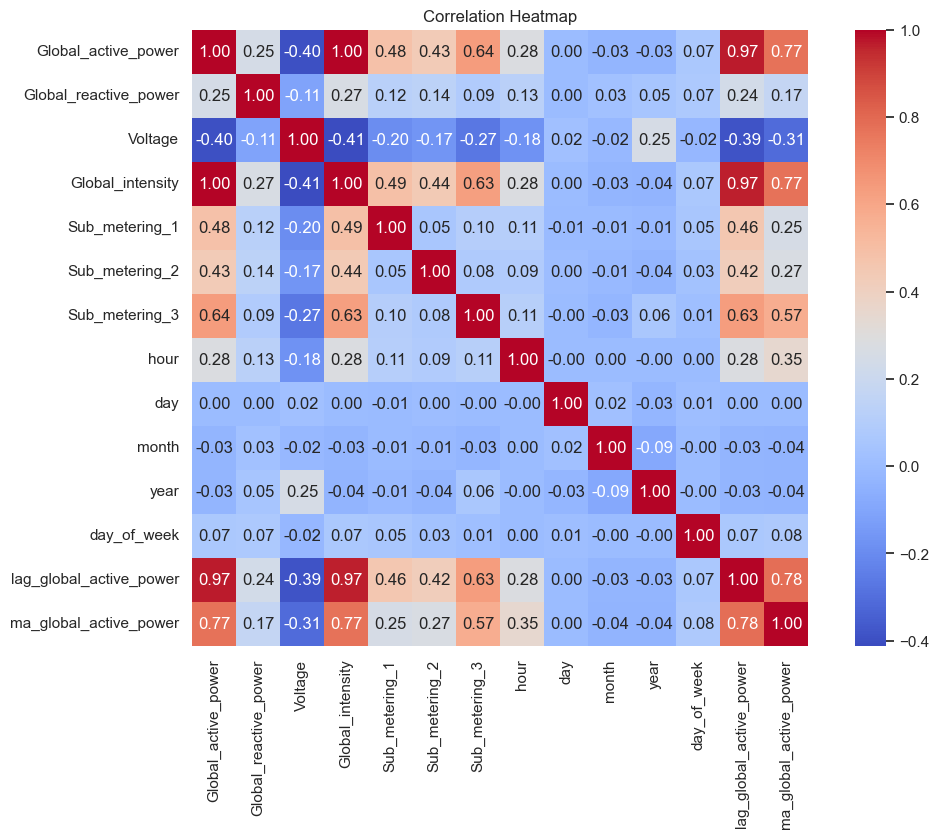

In [7]:
# Correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

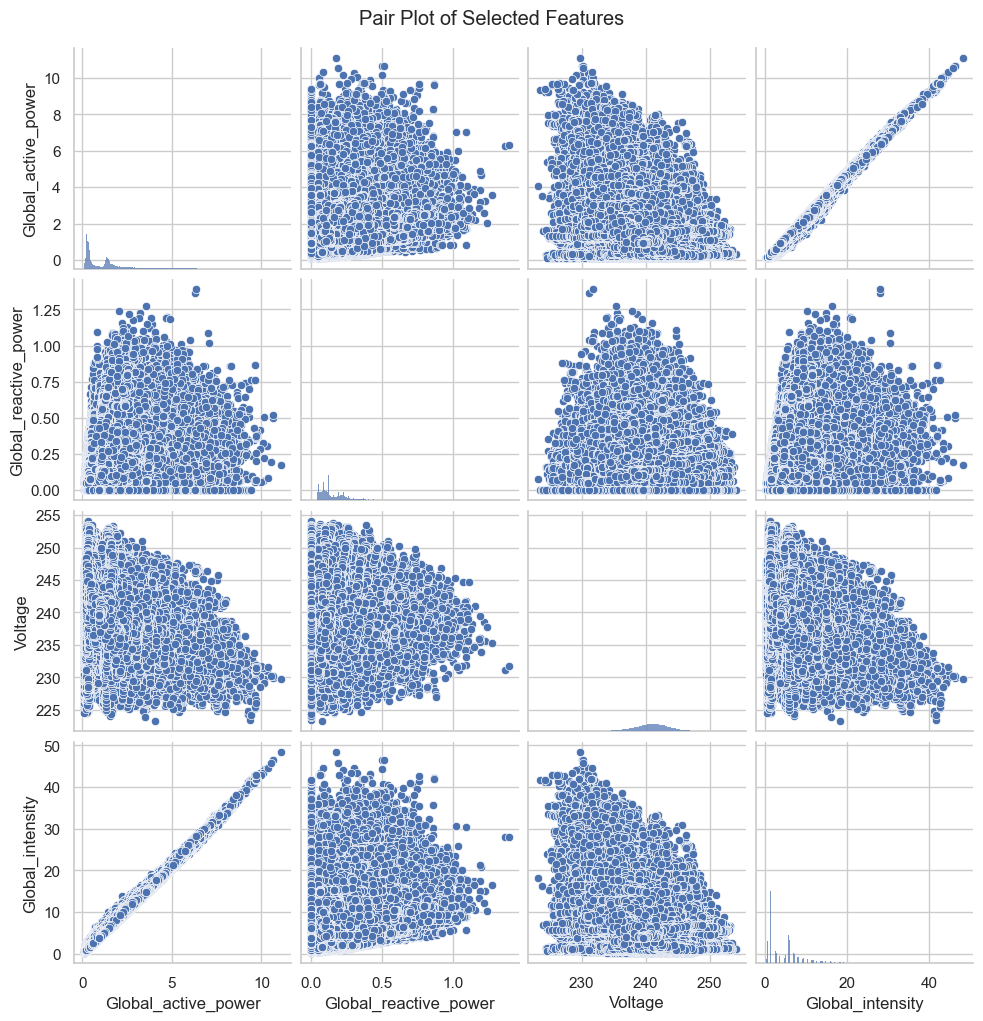

In [8]:
# Pair plot for selected features
sns.pairplot(df, vars=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


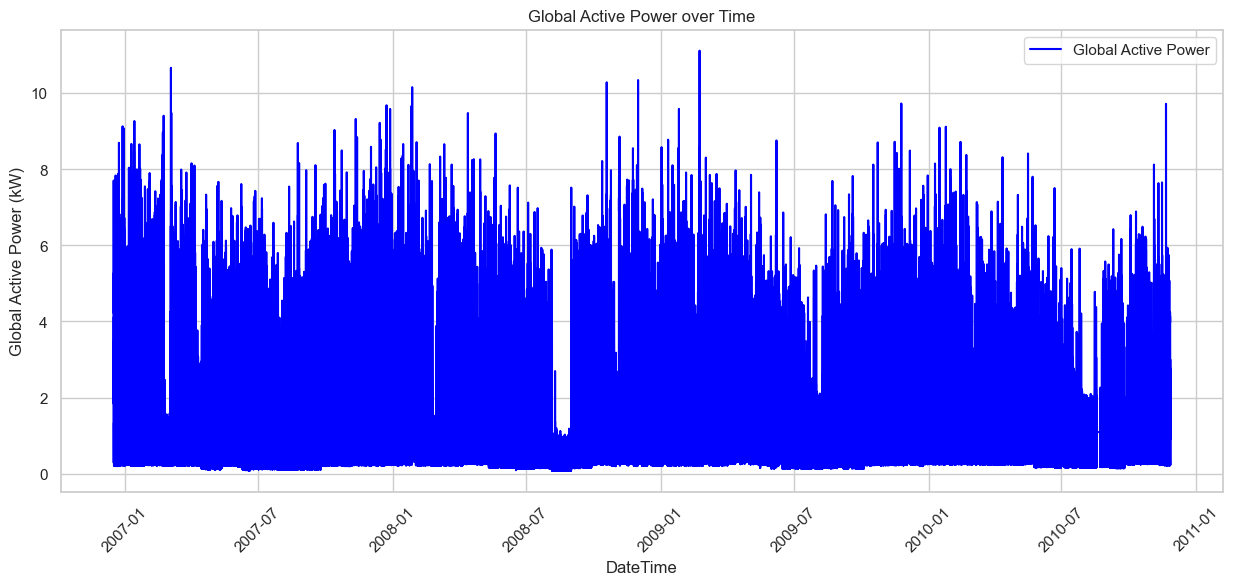

In [9]:
# Time series plot for Global Active Power
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Global Active Power over Time')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Model Implementation

### Linear Regression

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Global_active_power'])  # Features
y = df['Global_active_power']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Initialize the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")

Linear Regression MSE: 0.0015797442997699056


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid for Ridge and Lasso
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Ridge regression with GridSearchCV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

# Lasso regression with GridSearchCV
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train, y_train)

# Best hyperparameters and evaluation
print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}")

# Predictions and MSE
ridge_predictions = ridge_cv.predict(X_test)
lasso_predictions = lasso_cv.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")


Best Ridge alpha: 0.1
Best Lasso alpha: 0.01
Ridge Regression MSE: 0.0015797442911323783
Lasso Regression MSE: 0.0020143217028473206


In [13]:
# Evaluate Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

print(f"Linear Regression R²: {lr_r2}, MAE: {lr_mae}")


Linear Regression R²: 0.9985695702744422, MAE: 0.025054719126376055


### XG Boost

In [14]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data (use your preprocessed data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning set 1
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model_1.fit(X_train, y_train)
predictions_1 = xgb_model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, predictions_1)
print(f"Model 1 - MSE: {mse_1}")

# Hyperparameter tuning set 2
xgb_model_2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.05, max_depth=4)
xgb_model_2.fit(X_train, y_train)
predictions_2 = xgb_model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, predictions_2)
print(f"Model 2 - MSE: {mse_2}")

# Hyperparameter tuning set 3
xgb_model_3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.01, max_depth=8)
xgb_model_3.fit(X_train, y_train)
predictions_3 = xgb_model_3.predict(X_test)
mse_3 = mean_squared_error(y_test, predictions_3)
print(f"Model 3 - MSE: {mse_3}")


Model 1 - MSE: 0.0006197501267825624
Model 2 - MSE: 0.0008784550918780737
Model 3 - MSE: 0.0207837022189335


In [19]:
from sklearn.metrics import r2_score

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

# Make predictions
predictions = xgb_model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


R-squared: 0.9994388275343692


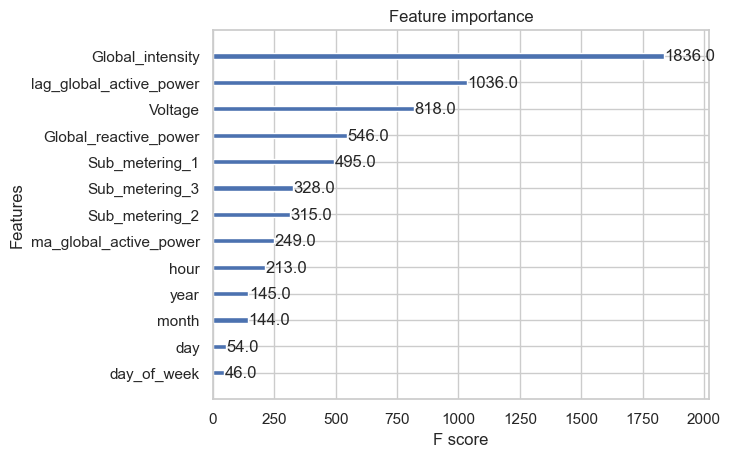

In [20]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model)
plt.show()
